In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchviz import make_dot
import torch.optim as optim

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [2]:
# sample data
sampleData1 = np.array([
    [166, 58.7],
    [176.0, 75.7],
    [171.0, 62.1],
    [173.0, 70.4],
    [169.0, 60.1]
])

print(sampleData1)

[[166.   58.7]
 [176.   75.7]
 [171.   62.1]
 [173.   70.4]
 [169.   60.1]]


In [3]:
# ML model에서 사용하기 위해 신장을 변수 x로 체중을 변수 y로 함
x = sampleData1[:, 0]
y = sampleData1[:, 1]

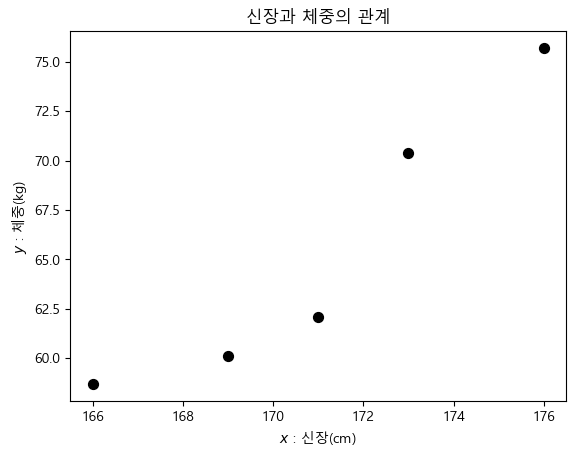

In [4]:
# 산포도 출력 확인
plt.scatter(x, y, c = 'k', s = 50)
plt.xlabel('$x$ : 신장(cm) ')
plt.ylabel('$y$ : 체중(kg) ')
plt.title('신장과 체중의 관계')
plt.show()

In [5]:
# 데이터 변환
X = x - x.mean()
Y = y - y.mean()

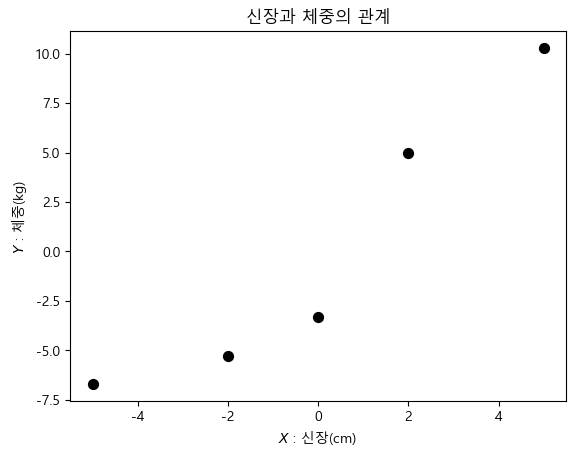

In [6]:
# 산포도 출력 확인
plt.scatter(X, Y, c = 'k', s = 50)
plt.xlabel('$X$ : 신장(cm) ')
plt.ylabel('$Y$ : 체중(kg) ')
plt.title('신장과 체중의 관계')
plt.show()

In [7]:
# X와 Y를 텐서 변수로 변환
X = torch.tensor(X).float()
Y = torch.tensor(Y).float()

# 결과 확인
print(X)
print(Y)

tensor([-5.,  5.,  0.,  2., -2.])
tensor([-6.7000, 10.3000, -3.3000,  5.0000, -5.3000])


In [8]:
# 파라미터 정의
# W와 B는 경사 계산을 위해, requires_grad = True로 설정함
W = torch.tensor(1.0, requires_grad = True).float()
B = torch.tensor(1.0, requires_grad = True).float()

In [9]:
# 예측 함수는 1차 함수
def pred(X):
    return W * X + B

In [10]:
# 예측 값 계산
Yp = pred(X)

In [11]:
# 결과 확인
print(Yp)

tensor([-4.,  6.,  1.,  3., -1.], grad_fn=<AddBackward0>)


In [12]:
# # 예측 값의 계산 그래프 표시
# params = {'W' : W, 'B' : B}

# g = make_dot(Yp, params = params)
# display(g)

In [13]:
# 평균 제곱 오차 손실 함수
def mse(Yp, Y):
    loss = ((Yp - Y) ** 2).mean()

    return loss

In [14]:
# 손실 계산
loss = mse(Yp, Y)

# 결과 표시
print(loss)

tensor(13.3520, grad_fn=<MeanBackward0>)


In [15]:
# # 손실 값의 계산 그래프 표시
# params = {'W' : W, 'B' : B}

# g = make_dot(loss, params = params)
# display(g)

In [16]:
# 경사 계산
loss.backward()

In [17]:
# 경삿값 확인
print(W.grad)
print(B.grad)

tensor(-19.0400)
tensor(2.0000)


In [18]:
# 학습률 정의
lr = 0.001

# 경사를 기반으로 파라미터 수정
W -= lr * W.grad
B -= lr * B.grad

RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.

## 에러가 발생하는 이유는 다음과 같음 <br>
- 경사 계산을 하는 도중의 변수(W와 B)는 외부에 영향을 끼치므로 마음대로 값을 수정할 수 없는 것
- 이와 같은 경우 with torch.no_grad()라는 컨텍스트를 설정해두면, 이 컨텍스트 내부에서는 일시적으로 계산 그래프 생성 기능이 작동하지 않으며
- 변수를 수정할 수 있음  

In [19]:
# 올바른 파라미터 수정 방법
# 경사 기반으로 파라미터 수정
# with torch.no_grad() 작성 필요
with torch.no_grad():
    W -= lr * W.grad
    B -= lr * B.grad

    # 계산이 끝난 후 경사값을 초기화함
    W.grad.zero_()
    B.grad.zero_()

In [20]:
# 파라미터 경삿값 확인
print(W)
print(B)
print(W.grad)
print(B.grad)

tensor(1.0190, requires_grad=True)
tensor(0.9980, requires_grad=True)
tensor(0.)
tensor(0.)


In [21]:
# 초기화
# W와 B를 변수로 사용
W = torch.tensor(1.0, requires_grad = True).float()
B = torch.tensor(1.0, requires_grad = True).float()

# 반복 횟수
num_epochs = 500

# 학습률
lr = 0.001

# optimizer로 SGD
optimizer = optim.SGD([W, B], lr = lr)

# history 기록을 위한 배열 초기화
history = np.zeros((0, 2))

# 루프 처리
for epoch in range(num_epochs):

    # 예측 계산
    Yp = pred(X)

    # 손실 계산
    loss = mse(Yp, Y)

    # 경사 계산
    loss.backward()

    # 파라미터 수정
    optimizer.step()

    # 경삿값 초기화
    optimizer.zero_grad()

    # 손실 기록
    if (epoch % 10 == 0):
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        print(f'epoch : {epoch}, loss = {loss : .4f}')

epoch : 0, loss =  13.3520
epoch : 10, loss =  10.3855
epoch : 20, loss =  8.5173
epoch : 30, loss =  7.3364
epoch : 40, loss =  6.5858
epoch : 50, loss =  6.1047
epoch : 60, loss =  5.7927
epoch : 70, loss =  5.5868
epoch : 80, loss =  5.4476
epoch : 90, loss =  5.3507
epoch : 100, loss =  5.2805
epoch : 110, loss =  5.2275
epoch : 120, loss =  5.1855
epoch : 130, loss =  5.1507
epoch : 140, loss =  5.1208
epoch : 150, loss =  5.0943
epoch : 160, loss =  5.0703
epoch : 170, loss =  5.0480
epoch : 180, loss =  5.0271
epoch : 190, loss =  5.0074
epoch : 200, loss =  4.9887
epoch : 210, loss =  4.9708
epoch : 220, loss =  4.9537
epoch : 230, loss =  4.9373
epoch : 240, loss =  4.9217
epoch : 250, loss =  4.9066
epoch : 260, loss =  4.8922
epoch : 270, loss =  4.8783
epoch : 280, loss =  4.8650
epoch : 290, loss =  4.8522
epoch : 300, loss =  4.8399
epoch : 310, loss =  4.8281
epoch : 320, loss =  4.8167
epoch : 330, loss =  4.8058
epoch : 340, loss =  4.7953
epoch : 350, loss =  4.7853
e

In [22]:
# 최종 파라미터 값
print('W = ', W.data.numpy())
print('B = ', B.data.numpy())

# 손실 확인
print(f'초기 상태 : 손실 : {history[0, 1] : .4f}')
print(f'최종 상태 : 손실 : {history[-1, 1] : .4f}')

W =  1.820683
B =  0.3675114
초기 상태 : 손실 :  13.3520
최종 상태 : 손실 :  4.6796


- 여기에 표시된 값은 이전 버전의 결과와 다르지 않음
- 사실, SGD라는 최적화 함수에 내장된 기본값으로 사용하는 것은
- 아래와 같은 계산식으로 파라미터를 변경하는 것과 다르지 않다.

In [23]:
# with torch.no_grad():
#     # 파라미터 수정
#     # 프레임워크를 사용하는 경우는 step 함수가 이를 대신함
#     W -= lr * W.grad
#     B -= lr * B.grad

In [24]:
# 최적화 함수 튜닝

# 초기화

# W와 B를 변수로 사용
W = torch.tensor(1.0, requires_grad = True).float()
B = torch.tensor(1.0, requires_grad = True).float()

# 반복 횟수
num_epochs = 500

# 학습률
lr = 0.001

# optimizer로 SGD
optimizer = optim.SGD([W, B], lr = lr, momentum = 0.9)

# history 기록을 위한 배열 초기화
history2 = np.zeros((0, 2))

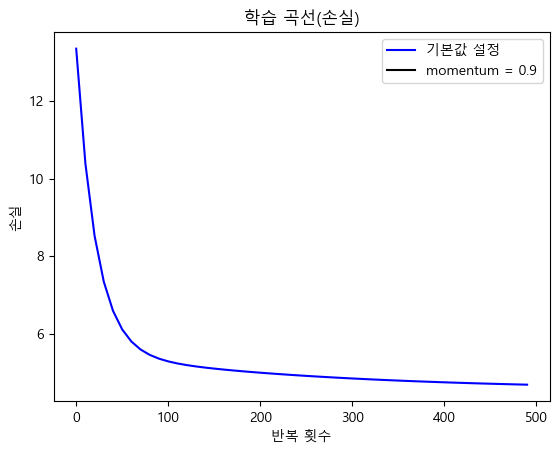

In [25]:
# 학습 곡선 출력
plt.plot(history[:, 0], history[:, 1], 'b', label = '기본값 설정')
plt.plot(history2[:, 0], history2[:, 1], 'k', label = 'momentum = 0.9')
plt.xlabel('반복 횟수')
plt.ylabel('손실')
plt.legend()
plt.title('학습 곡선(손실)')
plt.show()